# Prédicteur du résultat des matchs de la Premier League

## Import de librairies et des données

La librairie `pandas` sera utilisée pour l'analyse et la manipulation de données

In [43]:
import pandas as pd

Import du `.csv` des données de match sous la forme d'un en tant que *data frame* en considérant la première rangée comme titres des colonnes

In [44]:
matchs = pd.read_csv('epl_2015-2025.csv')

## Nettoyer les données

### Renommer les noms de variables et valeurs

En analysant la taille des données, on remarque $23$ variables différentes et $3690$ observations totales

Les significations des noms de variables sont explicités dans le fichier `column_def.txt`, il sera important de les modifier au sein du dataframe pour faciliter la compréhension

In [45]:
print(matchs.shape)
print(matchs.columns)

(3691, 23)
Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


Les noms des variables sont changés à l'aide de la fonction `.rename` et l'argument `inplace=True` pour modifier le *data frame* existant

In [46]:
matchs.rename(columns={'HomeTeam':'Domicile',
                        'AwayTeam':'Exterieur',
                        'FTR':'Resultat',
                        'HTR':'Resultat (mi-temps)',
                        'FTHG':'Buts domicile', 
                        'FTAG':'Buts exterieur',
                        'HTHG':'But domicile (mi-temps)',
                        'HTAG':'But exterieur (mi-temps)',
                        'HS':'Tirs domicile',
                        'AS':'Tirs exterieur',
                        'HST':'Tirs cadres domicile',
                        'HST':'Tirs cadres domicile',
                        'AST':'Tirs cadres exterieur',
                        'HF':'Fautes domicile',
                        'AF':'Fautes exterieur',
                        'HC':'Corners domicile',
                        'AC':'Corners exterieur',
                        'HY':'Cartons jaunes domicile',
                        'AY':'Cartons jaunes exterieur',
                        'HR':'Cartons rouges domicile',
                        'AR':'Cartons rouges exterieur',
                        'Referee':'Arbitre',
                        'Season':'Saison'
                        }, inplace=True)

Une fois les noms de colonnes modifiés, on peut maintenant mieux visualiser les données au sein du *data frame* en appellant la méthode `df.head()`

In [47]:
matchs.head()

,Date,Saison,Domicile,Exterieur,Buts domicile,Buts exterieur,Resultat,But domicile (mi-temps),But exterieur (mi-temps),Resultat (mi-temps),...,Tirs cadres domicile,Tirs cadres exterieur,Fautes domicile,Fautes exterieur,Corners domicile,Corners exterieur,Cartons jaunes domicile,Cartons jaunes exterieur,Cartons rouges domicile,Cartons rouges exterieur
0,08/08/2015,2015-2016,Bournemouth,Aston Villa,0,1,A,0,0,D,...,2,3,13,13,6,3,3,4,0,0
1,08/08/2015,2015-2016,Chelsea,Swansea,2,2,D,2,1,H,...,3,10,15,16,4,8,1,3,1,0
2,08/08/2015,2015-2016,Everton,Watford,2,2,D,0,1,A,...,5,5,7,13,8,2,1,2,0,0
3,08/08/2015,2015-2016,Leicester,Sunderland,4,2,H,3,0,H,...,8,5,13,17,6,3,2,4,0,0
4,08/08/2015,2015-2016,Man United,Tottenham,1,0,H,1,0,H,...,1,4,12,12,1,2,2,3,0,0


On peut maintenant remplacer les données des colonnes `Resultat` et `Resultat (mi-temps)` par des noms plus explicites dans le buts de faciliter l'analyse à l'aide de la méthode `df.map()`

In [48]:
map_resultat = {'H':'Victoire domicile', 'D':'Nul', 'A':'Victoire exterieur'}
matchs['Resultat'] = matchs['Resultat'].map(map_resultat)
matchs['Resultat (mi-temps)'] = matchs['Resultat (mi-temps)'].map(map_resultat)

In [49]:
print(matchs['Resultat'])

0       Victoire exterieur
1                      Nul
2                      Nul
3        Victoire domicile
4        Victoire domicile
               ...        
3686     Victoire domicile
3687                   Nul
3688    Victoire exterieur
3689     Victoire domicile
3690     Victoire domicile
Name: Resultat, Length: 3691, dtype: object


### Faire du *feature engineering* sur les variables

Dans le but d'avoir un modèle capable de prédire le plus efficacement possible les résultats futurs, il est important de penser et créer différentes variables qui permettraient d'estimer le mieux possible la variable cible du modèle, représentée dans ce cas-ci par le résultat du match (Victoire domicile, Victoire extérieur)

Également, pour que nos données puissent être passées à travers différents algorithmes dans le but de prédire les résultats futurs, on doit s'assurer que le type des variables concernées soit des `float`, `int`, `datetime` ou des variables catégorielles

En appellant `pd.info()` on peut voir que la première colonne à modifier serait `Date` pour la mettre en format `datetime` en appellant `pd.to_datetime()`

In [50]:
print(matchs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3691 non-null   object
 1   Saison                    3691 non-null   object
 2   Domicile                  3691 non-null   object
 3   Exterieur                 3691 non-null   object
 4   Buts domicile             3691 non-null   int64 
 5   Buts exterieur            3691 non-null   int64 
 6   Resultat                  3691 non-null   object
 7   But domicile (mi-temps)   3691 non-null   int64 
 8   But exterieur (mi-temps)  3691 non-null   int64 
 9   Resultat (mi-temps)       3691 non-null   object
 10  Arbitre                   3691 non-null   object
 11  Tirs domicile             3691 non-null   int64 
 12  Tirs exterieur            3691 non-null   int64 
 13  Tirs cadres domicile      3691 non-null   int64 
 14  Tirs cadres exterieur   

#### Transformer le format des dates

En apellant `pd.to_datetime()` on obtient une erreur en raison des rangées de $381$ à $760$ qui sont formattées de la manière `%Y-%m-%d` au lieu de `%d/%m/%Y` tel qu'accepté par la méthode

Nous devons regarder de plus près pour voir ce qui cause l'erreur et pouvoir y remédier

In [51]:
print(matchs['Date'][380:759])

380    2013-08-16
381    2013-08-16
382    2013-08-16
383    2013-08-16
384    2013-08-16
          ...    
754    2021-05-17
755    2021-05-17
756    2021-05-17
757    2021-05-17
758    2021-05-17
Name: Date, Length: 379, dtype: object


##### Rectifier les dates erronnées

En analysant les résultats obtenus, on s'apperçoit que de nombreuses dates ont été enregistrées de manière erronnée ce qui fausse l'information au sein du *data frame*

En recherchant en ligne les résultat du match correspondant à l'entrée $2013-08-16$ opposant les équipes `Burnley` et `Swansea` $(0-1)$, on s'apperçoit qu'il a réellement eu lieu à la date $13/08/2016$

C'est le même cas pour les entrées suivantes: par exemple lors du cas du match correspondant à l'entrée $2021-05-17$ opposant les équipes `Watford` et `Man City` $(5-1)$, qui a réellement eu lieu à la date $21/05/2017$

On doit donc créer un script afin de pouvoir modifier ces rangées pour les transformer par la suite, celui-ci devra inverser les chiffres représentant les années avec ceux représentant les jours et remplacer les `-` avec des `/`

In [52]:
# on itère à travers une liste de la longueur des rangées contenant des dates fautives
for i in range(380, 760):                                     
    # on spécifie qu'on itère à travers la colonne Date du data frame
    row = matchs['Date'][i]                                   
    # on extrait les valeurs de l'année qui représenteront les jours ex: (20XX-05-17) -> (XX/05/2017)
    jour = row[2:4]                                           
    # on extrait les valeurs du mois qui resteront les mêmes ex: (2021-XX-17) -> (21/XX/2017)
    mois = row[5:7]                                           
    # on extrait les valeurs des jours qui deviendront les dernières valeurs des années ex: (2021-05-XX) -> (21/05/20XX)
    annee = row[-2:]                                          
    # on combine maintenant les valeurs relevés en remplaçant les - avec des / pour correspondre au format datetime et on les remplace au sein de la colonne
    matchs.loc[i, 'Date'] = f'{jour}/{mois}/20{annee}'        

In [53]:
print(matchs['Date'][380:760])

380    13/08/2016
381    13/08/2016
382    13/08/2016
383    13/08/2016
384    13/08/2016
          ...    
755    21/05/2017
756    21/05/2017
757    21/05/2017
758    21/05/2017
759    21/05/2017
Name: Date, Length: 380, dtype: object


On observe donc que les dates sont maintenant correctes et peuvent donc être converties avec `pd.to_datetime()` en précisant l'argument `dayfirst=True`

In [54]:
matchs['Date'] = pd.to_datetime(matchs['Date'], dayfirst=True)

Avec les dates, on peut maintenant créer d'autres variables représentant les jours et les mois de la semaine, pour évaluer si certaines équipes jouent mieux ou moins bien durant certaines jours ou certains mois de l'année

In [55]:
matchs['JoursSemaine'] = matchs['Date'].dt.day_of_week
matchs['Mois'] = matchs['Date'].dt.month

#### Représenter les saisons

Pour ce qui en est de la variable saison on peut choisir de la transformer en `int` en considérant l'année de début de chaque saison. 
Par exemple, la saison $2015-2016$ deviendra $2015$, $2016-2017$ deviendra $2016$ et ainsi de suite

Pour ce faire, on `str.split` avec `-` et on convertit la colonne en type `int`

In [56]:
matchs['AnneeSaison'] = matchs['Saison'].str.split('-').str[0].astype(int)

À partir de cette nouvelle variable, on peut maintenant créer la variable `SemaineSaison` visant à déterminer la semaine de la saison à laquelle le match a eu lieu, certaines équipes performant mieux au début, au milieu ou à la fin de la saison

Pour ce faire, on associe dans `JoursSaison` le nombre de jours depuis le début de la saison $(5$ $août)$ et on divise par la suite cette colonne par $7$ pour obtenir la semaine de la saison durant laquelle l'équipe a joué

In [57]:
# fonction anonyme calculant le nombre de jours écoulés depuis le 5 août pour chaque saison
matchs['JoursSaison'] = matchs.apply(lambda x: (x['Date'] - pd.Timestamp(year=x['AnneeSaison'], month=8, day=5)).days, axis=1)      
# on ajoute 1 ici pour faire commencer la fonction à la semaine 1 comme sont typiquement affichés les matchs
matchs['SemaineSaison'] = matchs['JoursSaison'] // 7 + 1                                                                            

#### Représenter la valeur cible du modèle

Pour les bienfaits du modèle et dans le but d'améliorer ses performances, nous avons décidé de comptabiliser les matchs nuls comme des défaites car les matchs nuls sont excessivement difficiles à prédire dans le contexte de l'analytique sportive.

Les colonnes `Resultat` et `Resultat (mi-temps)` peuvent être réassignés dans une colonne catégorielle pour représenter $1$ dans le cas d'une victoire à domicile et $0$ dans le cas d'une victoire à l'extérieur. On utilise donc `df.map` une nouvelle fois pour réassigner ces valeurs. La valeur cible de notre modèle sera donc représentée par la colonne `Cible`, indiquant si l'équipe a gagné, perdu ou a égalisé. C'est la valeur que l'on cherchera à prédire à l'aide du reste des variables

Dans le cadre de la présente modélisation, nous avons choisi de ne pas inclure l'arbitre comme variable au modèle, pas besoin de devoir ainsi convertir cette variable spécifique

In [58]:
map_resultat_cat = {'Victoire exterieur':'0', 'Nul':'0', 'Victoire domicile':'1'}
matchs['Cible'] = (matchs['Resultat'].map(map_resultat_cat)).astype('int')
matchs['ResultatMT'] = (matchs['Resultat (mi-temps)'].map(map_resultat_cat)).astype('int')

#### Représenter les équipes

Les valeurs des équipes dans le *data frame* sont présentement des strings et ne peuvent pas être considérées comme des intrants au modèle. Il est nécessaire de les encoder en utilisant un code numérique à l'aide de la méthode `.cat.codes` de pandas. Par le fait même, on s'assure donc que le même code soit utilisé par les équipes domicile et celles à l'extérieur

Le code sera déterminé par odre alpabétique, *Arsenal* se verra donc associéee au code $0$, *Aston Villa* au code $1$ et ainsi de suite

On crée premièrement un nouveau *data frame* contenant les valeurs uniques des équipes

In [59]:
# on combine dans une liste les deux colonnes des équipes en conservant les valeurs uniques pour éviter le dédoublement
equipes = pd.concat([matchs['Domicile'], matchs['Exterieur']]).unique()             
# transformer la liste en data frame
equipes_df = pd.DataFrame({'Equipe':equipes})                                       

On associe par la suite un code numérique à chacune des équipes

In [60]:
# on convertit en catégorie et on utilise cat.codes pour associer un code numérique à chaque équipe
equipes_df['CodeEquipe'] = equipes_df['Equipe'].astype('category').cat.codes            
# on crée un dictionnaire pour pouvoir mapper les noms d'équipe aux différents codes
code_equipe = dict(zip(equipes_df['Equipe'], equipes_df['CodeEquipe']))                 

# avec map on peut maintenant associer un code à chaque équipe du data frame original
matchs['DomicileCode'] = matchs['Domicile'].map(code_equipe)                            
matchs['ExterieurCode'] = matchs['Exterieur'].map(code_equipe)

#### Représenter les performances des équipes

Il faut maintenant une manière de pouvoir évaluer la performance récente des équipes ou leur forme car il s'agit souvent d'un bon estimateur de ses résultats suivants. Une équipe venant de gagner plusieurs matchs consécutifs et qui est donc en bonne forme a généralement plus de confiance et cohésion et les points accumullés dans les matchs récents reflètent également les ajustements tactiques, le conditionnement des joueurs, leur moral et l'élan ainsi que les stratégies de l'équipe

On créera donc une fonction `stats_equipe` qui consulte les 5 matchs les plus récents pour chaque équipe et attribue $3$ points pour une victoire, $1$ point pour un match nul et $0$ pour une défaite

On calculera également les statistiques de buts des équipes depuis le début de la saison sous la forme d'une moyenne qui mesurerait la moyenne de buts marqués et encaissés par match. Ces métriques nous permettront par la suite d'établir des différentiels qui déduisent le nombre de buts encaissés du nombre de buts marqués dans le but d'essayer d'en déduire la performance future des équipes

In [61]:
def stats_equipe(matchs):                      
    matchs = matchs.sort_values('Date')                 # on trie les données par date
    
    matchs['DomicileForme'] = 0                         # on initialise deux colonnes ou seront stockés les points de forme
    matchs['ExterieurForme'] = 0

    # on initialise les colonnes où seront stockées les statistiques de but
    colonnes_buts = [
    'DomicileAvgButsMarques_Home', 'DomicileAvgButsEncaisses_Home',     
    'DomicileAvgButsMarques_Away', 'DomicileAvgButsEncaisses_Away',
    'ExterieurAvgButsMarques_Home', 'ExterieurAvgButsEncaisses_Home',
    'ExterieurAvgButsMarques_Away', 'ExterieurAvgButsEncaisses_Away']

    for col in colonnes_buts:
        matchs[col] = 0.0

    for i in range(len(matchs)):                        # on itère à travers les matchs
        match_eval = matchs.iloc[i]                     # on stocke les information du match évalué dans la variable match_eval
        equipe_domicile = match_eval['DomicileCode']
        equipe_exterieur = match_eval['ExterieurCode']
        date_match = match_eval['Date']
        saison_match = match_eval['AnneeSaison']

        # pour l'équipe à domicile la fonction trouve tous les matchs antérieurs à la date du match actuel où l'équipe a joué et les trie par date décroissante en consérvant les 5 plus récents
        prec_domicile_5 = matchs[(matchs['Date'] < date_match) &
                               ((matchs['DomicileCode'] == equipe_domicile) | (matchs['ExterieurCode'] == equipe_domicile))]
        prec_domicile_5 = prec_domicile_5.sort_values('Date', ascending=False).head(5)
        
        # pour l'équipe à domicile la fonction trouve tous les matchs antérieurs depuis le début de la saison où l'équipe a joué et les triepar date décroissante
        prec_domicile_saison = matchs[(matchs['Date'] < date_match) & (matchs['AnneeSaison'] == saison_match) &
                               ((matchs['DomicileCode'] == equipe_domicile) | (matchs['ExterieurCode'] == equipe_domicile))]
        
        # même processus pour l'équipe à l'extérieur
        prec_exterieur_5 = matchs[(matchs['Date'] < date_match) & 
                                ((matchs['DomicileCode'] == equipe_exterieur) | (matchs['ExterieurCode'] == equipe_exterieur))]
        prec_exterieur_5 = prec_exterieur_5.sort_values('Date', ascending=False).head(5)

        prec_exterieur_saison = matchs[(matchs['Date'] < date_match) & (matchs['AnneeSaison'] == saison_match) & 
                                ((matchs['DomicileCode'] == equipe_exterieur) | (matchs['ExterieurCode'] == equipe_exterieur))]

        # calcul des points de forme pour l'équipe à domicile
        # on initialise la variable qui comptera le nombre de points récoltés à domicile
        points_domicile = 0
        for j in range(len(prec_domicile_5)):             # on itère à travers les matchs précédents
            match_prec = prec_domicile_5.iloc[j]          # on stocke les informations de chaque itération du match précédant dans la variable match_prec
            # on itére à travers les 5 derniers matchs et on ajoute 1 point pour chaque victoire à domicile ou à l'extérieur
            if match_prec['DomicileCode'] == equipe_domicile and match_prec['Cible'] == 1:
                points_domicile += 1
            elif match_prec['ExterieurCode'] == equipe_domicile and match_prec['Cible'] == 0:
                points_domicile += 1

        # on répète la même procédure pour l'équipe à l'extérieur
        points_exterieur = 0
        for l in range(len(prec_exterieur_5)):          
            match_prec = prec_exterieur_5.iloc[l]          
            if match_prec['DomicileCode'] == equipe_exterieur and match_prec['Cible'] == 1:
                points_exterieur += 1
            elif match_prec['ExterieurCode'] == equipe_exterieur and match_prec['Cible'] == 0:
                points_exterieur += 1
       
        # on met à jour les colonnes récoltant le total des points à domicile et à l'extérieur
        matchs.at[i, 'DomicileForme'] = points_domicile
        matchs.at[i, 'ExterieurForme'] = points_exterieur    

        # calcul des statistiques de buts pour l'équipe à domicile
        dom_home_matches = prec_domicile_saison[prec_domicile_saison['DomicileCode'] == equipe_domicile]
        dom_away_matches = prec_domicile_saison[prec_domicile_saison['ExterieurCode'] == equipe_domicile]
        
        # calcul des statistiques de buts pour l'équipe à l'exterieur
        ext_home_matches = prec_exterieur_saison[prec_exterieur_saison['DomicileCode'] == equipe_exterieur]
        ext_away_matches = prec_exterieur_saison[prec_exterieur_saison['ExterieurCode'] == equipe_exterieur]

        # calcul des moyennes de buts pour l'équipe à domicile
        if len(dom_home_matches) > 0:
            matchs.at[i, 'DomicileAvgButsMarques_Home'] = dom_home_matches['Buts domicile'].mean()
            matchs.at[i, 'DomicileAvgButsEncaisses_Home'] = dom_home_matches['Buts exterieur'].mean()
        
        if len(dom_away_matches) > 0:
            matchs.at[i, 'DomicileAvgButsMarques_Away'] = dom_away_matches['Buts exterieur'].mean()
            matchs.at[i, 'DomicileAvgButsEncaisses_Away'] = dom_away_matches['Buts domicile'].mean()
        
        # calculs des moyennes de buts pour l'équipe extérieur  
        if len(ext_home_matches) > 0:
            matchs.at[i, 'ExterieurAvgButsMarques_Home'] = ext_home_matches['Buts domicile'].mean()
            matchs.at[i, 'ExterieurAvgButsEncaisses_Home'] = ext_home_matches['Buts exterieur'].mean()
        
        if len(ext_away_matches) > 0:
            matchs.at[i, 'ExterieurAvgButsMarques_Away'] = ext_away_matches['Buts exterieur'].mean()
            matchs.at[i, 'ExterieurAvgButsEncaisses_Away'] = ext_away_matches['Buts domicile'].mean()
    
    # on crée une nouvelle colonne récoltant la différence entre les points de forme à domicile et à l'extérieur
    matchs['DiffForme'] = matchs['DomicileForme'] - matchs['ExterieurForme']

    # on crée de nouvelles colonnes récoltant la différence des performance de buts entre l'équipe à domicile et celle à l'extérieur
    # on fait cela en calculant le différentiel de buts, représentant la différence entre la moyenne de buts marqués et la moyenne de buts encaissés
    matchs['DiffButsDomicile'] = matchs['DomicileAvgButsMarques_Home'] - matchs['DomicileAvgButsEncaisses_Home']
    matchs['DiffButsExterieur'] = matchs['ExterieurAvgButsMarques_Away'] - matchs['ExterieurAvgButsEncaisses_Away']
    matchs['DiffButs'] = matchs['DiffButsDomicile'] - matchs['DiffButsExterieur']
    matchs['DiffButsGlobal'] = ((matchs['DomicileAvgButsMarques_Home'] - matchs['DomicileAvgButsEncaisses_Home'] +
                          matchs['DomicileAvgButsMarques_Away'] - matchs['DomicileAvgButsEncaisses_Away']) - 
                          (matchs['ExterieurAvgButsMarques_Home'] - matchs['ExterieurAvgButsEncaisses_Home'] +
                          matchs['ExterieurAvgButsMarques_Away'] - matchs['ExterieurAvgButsEncaisses_Away'])) 
    return matchs

On peut maintenant appliquer la fonction créée au *data frame* original et stocker le nouveau *data frame* dans la variable `matchs_features`

In [62]:
matchs_stats = stats_equipe(matchs)

#### Représenter l'historique des face-à-face précédents

L'historique des confrontations directes entres deux équipes s'agit également d'un indicateur clé en ce qui concerne leur performance future s'ils avaient à s'affronter à nouveau.

On créera donc une fonction `faf_equipes` (face-à-face) qui canalyse l'historique des confrontations directes entre deux équipes pour créer des caractéristiques utiles à la prédiction

In [63]:
def faf_equipes(matchs):
    matchs = matchs.sort_values('Date')                 # on trie les données par date
    matchs['FAF_VictoiresDomicile'] = 0                 # on initialise deux colonnes ou seront stockés les victoires en face-à-face
    matchs['FAF_VictoiresExterieur'] = 0

    for i in range(len(matchs)):
        match_eval = matchs.iloc[i]                     # on stocke les information du match évalué dans la variable match_eval
        equipe_domicile = match_eval['DomicileCode']
        equipe_exterieur = match_eval['ExterieurCode']
        date_match = match_eval['Date']

        # on cherche à travers tous les matchs précédent la date du match évalué pour stocker dans prec_faf les matchs ou les deux équipes ont joué l'une contre l'autre
        prec_faf = matchs[(matchs['Date'] < date_match) & 
                    (((matchs['DomicileCode'] == equipe_domicile) & (matchs['ExterieurCode'] == equipe_exterieur)) | 
                    ((matchs['DomicileCode'] == equipe_exterieur) & (matchs['ExterieurCode'] == equipe_domicile)))]

        # calcul du nombre de victoires et de matchs nuls lors des face-à-face
        # on initialise les variables qui vont compter les victoires lors des faces-à-faces
        victoires_domicile = 0
        victoires_exterieur = 0
        
        for j in range(len(prec_faf)):                  # on itère à travers les matchs précédents
            faf = prec_faf.iloc[j]                      # on stocke les informations de chaque itération du match précédant dans la variable faf
            # on commence par itérer à travers le cas où l'équipe à évaluer (Domicile) a joué un face-à-face également à domicile
            if faf['DomicileCode'] == equipe_domicile: 
                # on augmente la variable victoire_domicile dans l'éventualité où l'équipe à évaluer a gagné
                if faf['Cible'] == 1:
                    victoires_domicile += 1
                # on augmente la variable victoire_extérieur dans l'éventualité où l'équipe à évaluer a perdu
                elif faf['Cible'] == 0:
                    victoires_exterieur += 1
            # on répète la même procédure dans le cas où l'équipe à évaluer a joué un face-à-face à l'extérieur
            elif faf['DomicileCode'] == equipe_exterieur: 
                if faf['Cible'] == 1:
                    victoires_exterieur += 1
                elif faf['Cible'] == 0:
                    victoires_domicile += 1
        
        # on met à jour les colonnes récoltant le total des victoires et matchs nuls en face-à-face
        matchs.at[i, 'FAF_VictoiresDomicile'] = victoires_domicile
        matchs.at[i, 'FAF_VictoiresExterieur'] = victoires_exterieur
    
    return matchs

In [64]:
matchs_features = faf_equipes(matchs_stats)

En analysant les données récoltées par les fonctions, on s'apperçoit que pour les $191$ premiers matchs, les données de forme des équipes et de face-à-face ont souvent des valeurs de $0$ car les équipes n'ont pas encore toutes jouées leur premier match et n'ont pas encore fait face a chacun des adversaires de la ligue

Afin de ne pas fausser le modèle, nous allons exclure ces premiers matchs du jeu de données utilisé pour la prédiction. On utilise la méthode `.reset_index` pour réindexer le *data frame* en indiquant avec `drop=True` de ne pas conserver les anciens indices

In [65]:
matchs_features = matchs_features.sort_values('Date').iloc[192:].reset_index(drop=True)

In [66]:
# vals = [
#     'Date', 'DomicileCode', 'Domicile', 'ExterieurCode', 'Exterieur', 
#     'DomicileForme', 'ExterieurForme', 'DiffForme', 'FAF_VictoiresDomicile', 
#     'FAF_VictoiresExterieur', 'SemaineSaison', 'Mois', 'AnneeSaison',
#     'DomicileAvgButsMarques_Home', 'DomicileAvgButsEncaisses_Home',
#     'DomicileAvgButsMarques_Away', 'DomicileAvgButsEncaisses_Away',
#     'ExterieurAvgButsMarques_Home', 'ExterieurAvgButsEncaisses_Home',
#     'ExterieurAvgButsMarques_Away', 'ExterieurAvgButsEncaisses_Away', 
#     'DiffButsDomicile', 'DiffButsExterieur', 'DiffButs', 'DiffButsGlobal',
#     'Cible',
# ]

# matchs_features[vals].to_csv('vals_nodraw.csv')

Les variables et le jeu de données que nous allons utiliser pour la prédiction sont maintenants prêtes a être utilisées comme intrants au modèle

## Créer le modèle prédictif

On importe les librairies `scikit-learn` et `xgboost` pour utiliser leurs algorithmes prédictifs et pour analyser les résultats obtenus. Nous allons utiliser l'algorithme de classification du *extreme gradient boosting (XGBoost)* dans le cadre de ce projet pour son efficacité auprès de données non-linéaires et son utilisation fréquente en analytique sportive

In [67]:
import xgboost as xgb

### Définir les groupes d'entraînement et de test

On sépare les données d'entraînement et les données de test selon un $80/20$ split dans le cas présent. Pour ce jeu de données, il est important de les séparer de façon chronologique comme il s'agit de données temporelles. Les données ont déjà été ordonnées selon la date au moment de d'extraire les $192$ premières

In [68]:
split = int(len(matchs_features) * 0.8)                      # on définit un point de coupure (dans ce cas-ci 80% d'entraînement pour 20% de test)
train = matchs_features.iloc[:split]                         # on sépare en données d'entraînement
test = matchs_features.iloc[split:]                          # et en données de test

print(f"Période d'entraînement: {train['Date'].min()} à {train['Date'].max()}")         # on imprime les dates d'entraînement et de test à titre de référence
print(f"Période de test: {test['Date'].min()} à {test['Date'].max()}")

Période d'entraînement: 2016-01-02 00:00:00 à 2023-04-30 00:00:00
Période de test: 2023-04-30 00:00:00 à 2025-02-27 00:00:00


On définit maintenant les variables explicatives et la variable cible allant être utilisées par le modèle parmi celles créées plus tôt. En testant différentes combinaisons de variables explicatives, la suivante permet d'obtenir la meilleure performance du modèle

In [69]:
# variables explicatives provenant du feature engineering qui serviront à prédire la variable cible
features = [
    'DomicileCode', 'ExterieurCode', 'DomicileForme',
    'ExterieurForme', 'DiffForme', 'FAF_VictoiresDomicile', 
    'FAF_VictoiresExterieur', 'SemaineSaison', 'Mois', 'AnneeSaison',
    'DomicileAvgButsMarques_Home', 'DomicileAvgButsEncaisses_Home',
    'DomicileAvgButsMarques_Away', 'DomicileAvgButsEncaisses_Away',
    'ExterieurAvgButsMarques_Home', 'ExterieurAvgButsEncaisses_Home',
    'ExterieurAvgButsMarques_Away', 'ExterieurAvgButsEncaisses_Away',
    'DiffButsDomicile', 'DiffButsExterieur', 'DiffButsGlobal'
    #'DiffButs',
]

# variable cible représentant les résultats de chacun des matchs évalués (0: Victoire extérieur, 1: Victoire domicile)
target = ['Cible']

On peut maintenant préparer les données d'entraînement et de test

In [70]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

On peut valider la proportion de la variable cible au sein des ensembles d'entraînement et de test en utilisant la méthode `.value_counts` tout en comptant le nombre de matchs utilisés pour l'entraînement et le test en créant deux *data frames* respectifs

In [71]:
print("Distribution des classes:")
print("\nEnsemble d'entraînement:")
train_dist = pd.DataFrame({
    'Nombre de matchs': y_train.value_counts().sort_index(),
    'Pourcentage': y_train.value_counts(normalize=True).sort_index() * 100
})
print(train_dist)
print(f'\nTotal : {len(y_train)} matchs')

print("\nEnsemble de test:")
test_dist = pd.DataFrame({
    'Nombre de matchs': y_test.value_counts().sort_index(),
    'Pourcentage': y_test.value_counts(normalize=True).sort_index() * 100
})
print(test_dist)
print(f'\nTotal : {len(y_test)} matchs')

Distribution des classes:

Ensemble d'entraînement:
       Nombre de matchs  Pourcentage
Cible                               
0                  1541    55.055377
1                  1258    44.944623

Total : 2799 matchs

Ensemble de test:
       Nombre de matchs  Pourcentage
Cible                               
0                   390    55.714286
1                   310    44.285714

Total : 700 matchs


### Optimiser les hyperparamètres du modèle XGBoost

Dans le but d'optimiser le mieux possibles les nombreux paramètres du modèle *XGBoost* nous allons utiliser le *RandomSearch*. En précisant une liste de paramètres initiaux, la méthode va tenter par processus d'essai-erreur d'essayer d'utiliser différentes combinaisons dans le but de maximiser le score du modèle prédictif

Pour utiliser cette méthode, on importe `RandomizedSearchCV` au depuis la librairie `sklearn`.

In [72]:
from sklearn.model_selection import RandomizedSearchCV

On peut maintenant utiliser le *RandomSearch* d'une manière similaire en spécifiant des paramètres initiaux qui seront par la suite optimisés

Comme le *RandomSearch* est beaucoup moins demandant en terme de resources computationnelles que d'autres méthodes d'optimisation d'hyperparamètres, on peut préciser davantages de paramètres et d'itérations. Les paramètres initiaux ci-bas ont été trouvés à l'aide du modèle d'IA *Claude 3.7 Sonnet*, en lui précisant de l'information sur le jeu de données, la tâche de classification à résoudre et la composition des classes dans les données d'entraînement

In [73]:
# param_distribution = {
#     # Tree structure parameters
#     'n_estimators': [500, 1000, 1500, 2000],
#     'max_depth': [4, 6, 8, 10, 12],
#     'min_child_weight': [1, 3, 5, 7],
    
#     # Regularization parameters
#     'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15],
#     'gamma': [0, 0.05, 0.1, 0.2, 0.3],
#     'reg_alpha': [0, 0.1, 0.5, 1.0],
#     'reg_lambda': [0.1, 1.0, 5.0, 10.0],
    
#     # Subsampling parameters
#     'subsample': [0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#     'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],
    
#     # Class imbalance handling
#     'scale_pos_weight': [1.0, 1.1, 1.2, 1.225]  # Based on your 55/45 class imbalance
# }

# # Other fixed parameters
# fixed_params = {
#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',      # AUC is better for imbalanced classification
#     'tree_method': 'hist',     # For faster computation
#     'use_label_encoder': False # Avoid warnings
# }

In [74]:
# model = xgb.XGBClassifier(**fixed_params)

# # Number of iterations - increase for better coverage
# n_iter = 100

# random_search = RandomizedSearchCV(
#     model, 
#     param_distributions=param_distribution,
#     n_iter=n_iter,
#     scoring='roc_auc',  
#     cv=5,               # 5-fold cross-validation
#     verbose=3,
#     random_state=42,
#     n_jobs=-1           # Use all available cores
# )

# random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.9;, score=0.593 total time=   0.5s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.9;, score=0.615 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.9;, score=0.522 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.9;, score=0.578 total time=   0.4s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.9;, score=0.621 total time=   0.4s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.608 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.589 total time=   1.2s
[CV 1/5] END colsample_bylevel=0.9,

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.609 total time=   1.3s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.528 total time=   1.3s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.634 total time=   1.3s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.597 total time=   0.3s
[CV 3/5] END colsample_bylevel=

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.568 total time=   0.4s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.645 total time=   0.3s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.8;, score=0.607 total time=   0.2s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.8;, score=0.588 total time=   0.3s
[CV 3/5] END colsample_bylevel=0.7, 

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.7;, score=0.597 total time=   0.7s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.7;, score=0.607 total time=   0.7s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.7;, score=0.655 total time=   0.8s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=500, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.8;, score=0.620 total time=   0.3s
[CV 4/5] END colsample_byl

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.598 total time=   0.7s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.9;, score=0.617 total time=   0.5s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.572 total time=   0.6s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.649 total time=   0.6s
[CV 3/5] END colsample_bylevel=1.0, col

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.9;, score=0.635 total time=   0.6s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.9;, score=0.527 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.9;, score=0.575 total time=   0.6s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.9;, score=0.662 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.590 total time=   1.1s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.626 total time=   1.2s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.604 total time=   1.1s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.551 total time=   1.2s
[CV 5/5] END colsample_bylevel=0.9, 

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.623 total time=   1.0s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.611 total time=   1.3s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.607 total time=   0.4s[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.525 total time=   1.1s

[CV 2/5] END colsample_bylevel=0.8, c

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.527 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.581 total time=   0.3s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.650 total time=   0.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.570 total time=   1.0s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.640 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.591 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.629 total time=   1.2s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.548 total time=   1.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.602 total time=   1.2s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.607 total time=   0.7s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.527 total time=   2.7s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.623 total time=   2.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.601 total time=   3.0s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.656 total time=   2.8s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1500, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.587 total time=   2.9s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.638 total time=   1.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.600 total time=   0.7s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.547 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.511 total time=   0.9s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.637 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.595 total time=   0.7s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.632 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.521 total time=   0.7s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.638 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.580 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.8;, score=0.599 total time=   1.2s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.8;, score=0.599 total time=   1.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.8;, score=0.638 total time=   1.4s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.8;, score=0.599 total time=   1.0s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.8;, score=0.529 total time=   1.0s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.8;, score=0.653 total time=   1.3s
[CV 3/5] END colsample_bylevel=0.8

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.8;, score=0.599 total time=   1.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.598 total time=   0.5s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.618 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.8;, score=0.592 total time=   0.9s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=1.0;, score=0.611 total time=   0.4s
[CV 3/5] END colsample_bylevel=0.8, col

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=1.0;, score=0.624 total time=   0.2s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=1.0;, score=0.525 total time=   0.2s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=1.0;, score=0.573 total time=   0.2s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.630 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=1.0;, score=0.649 total time=   0.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=10, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.585 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.628 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=10, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.629 total time=   0.7s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.641 total time=   0.9s
[CV 4/5] END colsample_bylevel=0

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16


[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.526 total time=   1.0s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=10, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.524 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=10, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.592 total time=   0.8s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.03, max_depth=10, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.652 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.8;, score=0.597 total time=   1.2s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.8;, score=0.628 total time=   1.2s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.8;, score=0.537 total time=   1.4s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.604 total time=   1.2s
[CV 5/5] END colsample_bylevel=1.0, colsample_

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.8;, score=0.606 total time=   1.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.631 total time=   0.5s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.603 total time=   0.5s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.560 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.512 total time=   1.3s
[CV 3/5] END colsample_bylevel=1.0, colsamp

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.632 total time=   0.5s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.659 total time=   1.2s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0, learning_rate=0.03, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.8;, score=0.578 total time=   1.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.7;, score=0.585 total time=   1.0s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.7;, score=0.540 total time=   1.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.7;, score=0.626 total time=   1.1s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.7;, score=0.603 total time=   1.2s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.7;, score=0.606 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.623 total time=   0.5s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.599 total time=   0.6s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.534 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.581 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.635 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.9;, score=0.610 total time=   2.2s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.9;, score=0.518 total time=   2.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.9;, score=0.627 total time=   2.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.9;, score=0.585 total time=   2.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.9;, score=0.653 total time=   2.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.602 total time=   2.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.627 total time=   2.3s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.05, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.589 total time=   1.8s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.516 total time=   2.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.574 total time=   2.3s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.05, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.605 total time=   1.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.638 total time=   2.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.05, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.511 total time=   1.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.05, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.593 total time=   1.9s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.579 total time=   1.4s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.607 total time=   1.3s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.532 total time=   1.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.592 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.598 total time=   1.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.05, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.636 total time=   2.0s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.626 total time=   1.4s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.602 total time=   0.6s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.516 total time=   0.7s
[CV 4/5] END colsample_byleve

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.623 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.598 total time=   1.6s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.618 total time=   1.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.533 total time=   1.5s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.601 total time=   1.6s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.631 total time=   1.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.619 total time=   1.3s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.585 total time=   1.5s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.517 total time=   2.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.628 total time=   3.1s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.604 total time=   3.1s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.538 total time=   1.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.7;, score=0.587 total time=   0.8s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.7;, score=0.531 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.7;, score=0.614 total time=   0.8s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.579 total time=   2.9s
[CV 4/5] END colsample_bylevel=0.7, cols

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.602 total time=   1.4s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.644 total time=   3.1s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.631 total time=   1.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=0.7;, score=0.625 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.615 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.628 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.523 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.639 total time=   1.7s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.597 total time=   1.7s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.604 total time=   1.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.563 total time=   0.8s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.540 total time=   2.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.664 total time=   1.0s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.0, subsample=0.9;, score=0.651 total time=   2.0s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.587 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.612 total time=   0.9s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.594 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.537 total time=   1.0s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.589 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.595 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.524 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.588 total time=   1.1s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=2000, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.636 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.643 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.611 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.649 total time=   0.9s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.527 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.614 total time=   0.4s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=1500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.598 total time=   1.8s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=1500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.618 total time=   1.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=1500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.511 total time=   1.9s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=1500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.645 total time=   1.9s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.573 total time=   0.8s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.03, max_depth=12, min_child_weight=1, n_estimators=1500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.586 total time=   2.0s
[CV 5/5] END colsample_bylevel=0.8

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.640 total time=   0.4s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.528 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.588 total time=   0.3s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.668 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.594 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.614 total time=   0.9s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.598 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.607 total time=   0.9s
[CV 3/5] END colsample_bylevel=0.7, cols

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.591 total time=   1.1s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.03, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.650 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.530 total time=   1.2s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.582 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.521 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5, n_estimators=2000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.8;, score=0.594 total time=   0.8s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=1.0;, score=0.604 total time=   0.3s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.615 total time=   1.1s
[CV 4/5] END colsample_bylevel=0.7, col

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=1.0;, score=0.597 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=1.0;, score=0.573 total time=   0.3s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=1.0;, score=0.516 total time=   0.4s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=1.0;, score=0.626 total time=   0.4s
[CV 2/5] END colsample_bylevel=0

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.617 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.572 total time=   0.4s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.519 total time=   0.4s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.9;, score=0.619 total time=   0.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.604 total time=   0.5s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.592 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.588 total time=   0.7s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.530 total time=   0.7s
[CV 2/5] END colsample_bylevel=0.8, co

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.617 total time=   0.9s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.01, max_depth=6, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.662 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.650 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.546 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.2, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.7;, score=0.607 total time=   0.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.2, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.7;, score=0.637 total time=   0.4s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.2, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.7;, score=0.549 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.2, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.7;, score=0.599 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.9;, score=0.578 total time=   1.0s
[CV 2/5] END colsample_bylevel=0.9, colsam

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.9;, score=0.637 total time=   1.1s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.2, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=500, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.7;, score=0.652 total time=   0.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.03, max_depth=4, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.602 total time=   0.7s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.03, max_depth=4, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.532 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.03, max_depth=4, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.630 total time=   0.8s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.03, max_depth=4, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.579 total time=   0.8s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.615 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.03, max_depth=4, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.636 total time=   1.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.642 total time=   0.7s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.535 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.588 total time=   2.9s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.587 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.05, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.655 total time=   0.6s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.623 total time=   2.9s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.527 total time=   3.0s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.620 total time=   3.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=12, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.585 total time=   3.2s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.8;, score=0.590 total time=   1.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.8;, score=0.521 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.8;, score=0.614 total time=   1.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.8;, score=0.604 total time=   1.0s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=0.8;, score=0.631 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.605 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.644 total time=   0.8s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.537 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.588 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.03, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.0, subsample=1.0;, score=0.647 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.595 total time=   2.6s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.639 total time=   2.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.535 total time=   2.5s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.582 total time=   1.0s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.601 total time=   2.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.657 total time=   2.7s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.600 total time=   1.0s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.597 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.534 total time=   1.0s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.8;, score=0.600 total time=   1.0s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.596 total time=   0.7s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.517 total time=   0.7s
[CV 5/5] END colsample_bylevel=0.9, 

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.636 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.7;, score=0.599 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.615 total time=   0.9s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.528 total time=   0.9s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.577 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.643 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.659 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.605 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.608 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.518 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.8;, score=0.584 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.569 total time=   0.8s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.596 total time=   2.5s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=1500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=1.0;, score=0.624 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.533 total time=   2.3s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.625 total time=   2.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.8;, score=0.530 total time=   0.5s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.8;, score=0.586 total time=   0.5s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.8;, score=0.601 total time=   0.5s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1, n_estimators=500, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.8;, score=0.626 total time=   0.5s
[CV 5/5] END colsample_bylevel=0.9, cols

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.05, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.592 total time=   2.8s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.8;, score=0.591 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.8;, score=0.521 total time=   0.7s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.8;, score=0.619 total time=   0.7s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.8;, score=0.630 total time=   0.7s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.8;, score=0.570 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.616 total time=   0.6s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.631 total time=   0.6s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.597 total time=   1.3s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.516 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.615 total time=   1.3s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.586 total time=   1.2s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.526 total time=   1.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.596 total time=   0.6s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=2000, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.620 total time=   1.2s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.599 total time=   0.5s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.05, learning_rate=0.15, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=1.0;, score=0.636 total time=   0.6s
[CV 2/5] END colsample_bylevel=0.

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.571 total time=   0.5s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.649 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.9;, score=0.615 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.9;, score=0.587 total time=   0.7s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.9;, score=0.529 total time=   0.7s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.225, subsample=0.9;, score=0.598 total time=   0.7s
[CV 5/5] END colsample_bylev

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.595 total time=   1.5s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.578 total time=   0.9s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.618 total time=   1.5s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.522 total time=   1.5s
[CV 2/5] END colsample_bylevel=0.

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.532 total time=   1.2s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.589 total time=   1.4s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.1, learning_rate=0.03, max_depth=12, min_child_weight=7, n_estimators=1000, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.638 total time=   1.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.639 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.614 total time=   0.2s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.8;, score=0.596 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.649 total time=   0.2s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.531 total time=   0.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.564 total time=   0.2s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.655 total time=   0.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.639 total time=   1.6s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.602 total time=   1.6s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.538 total time=   1.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.600 total time=   1.5s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=8, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.9;, score=0.661 total time=   1.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.587 total time=   0.6s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.597 total time=   1.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.623 total time=   0.6s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.523 total time=   0.6s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.534 total time=   1.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.613 total time=   1.7s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.599 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.6, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.8;, score=0.619 total time=   0.6s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.592 total time=   0.6s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.596 total time=   0.6s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=1.0, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.7;, score=0.604 total time=   1.5s
[CV 5/5] END colsample_bylevel=1.0, 

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.586 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.1, subsample=1.0;, score=0.612 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.7;, score=0.593 total time=   0.7s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.7;, score=0.608 total time=   0.7s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.7;, score=0.610 total time=   0.7s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.7;, score=0.533 total time=   0.8s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=0.7;, score=0.590 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.527 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.594 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.629 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=1.0;, score=0.588 total time=   2.1s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.598 total time=   0.7s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=1.0;, score=0.637 total time=   2.0s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=1500, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.626 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=1.0;, score=0.583 total time=   2.0s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=1.0;, score=0.521 total time=   2.2s
[CV 1/5] END colsample_bylevel=1.0, colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.603 total time=   1.1s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=1500, reg_alpha=1.0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=1.0;, score=0.645 total time=   2.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.507 total time=   1.0s
[CV 4/5] END colsample_bylevel=1.0, colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.570 total time=   1.0s
[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.610 total time=   1.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.5, gamma=0.05, learning_rate=0.03, max_depth=6, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.0, subsample=0.8;, score=0.640 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.600 total time=   1.1s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.599 total time=   1.1s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.510 total time=   1.1s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.578 total time=   1.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.603 total time=   0.7s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.609 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.527 total time=   0.8s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.627 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.1, subsample=0.7;, score=0.591 total time=   0.7s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.5, gamma=0.05, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=2000, reg_alpha=0.1, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.9;, score=0.631 total time=   1.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.588 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.602 total time=   0.8s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.519 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.598 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.592 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.634 total time=   2.1s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.601 total time=   2.3s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.8;, score=0.625 total time=   0.9s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.513 total time=   2.2s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.562 total time=   2.2s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.630 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.533 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.594 total time=   0.5s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=2000, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.659 total time=   2.2s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.1, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.644 total time=   0.5s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.591 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.534 total time=   0.5s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.616 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.580 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0.5, reg_lambda=10.0, scale_pos_weight=1.2, subsample=1.0;, score=0.631 total time=   0.6s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.7;, score=0.594 total time=   0.6s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.7;, score=0.615 total time=   0.6s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.7;, score=0.549 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.7, colsample

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.7;, score=0.646 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.599 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.618 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.516 total time=   0.8s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.582 total time=   0.8s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.225, subsample=0.9;, score=0.644 total time=   0.8s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.578 total time=   0.4s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.616 total time=   0.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.521 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.572 total time=   0.4s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.620 total time=   0.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.591 total time=   1.6s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.614 total time=   1.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.625 total time=   1.4s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.525 total time=   1.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=7, n_estimators=2000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.225, subsample=0.7;, score=0.605 total time=   1.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.592 total time=   1.2s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.599 total time=   1.2s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.531 total time=   1.2s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.634 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.596 total time=   0.9s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.607 total time=   1.2s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=2000, reg_alpha=0.1, reg_lambda=1.0, scale_pos_weight=1.2, subsample=0.7;, score=0.630 total time=   1.2s
[CV 3/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.534 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:33:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.600 total time=   0.5s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.600 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.535 total time=   0.4s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.634 total time=   0.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.0, subsample=0.7;, score=0.574 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.578 total time=   0.9s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.593 total time=   0.6s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=1500, reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1.2, subsample=0.7;, score=0.655 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.596 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.530 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.585 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.595 total time=   0.5s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=5, n_estimators=1500, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.617 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.570 total time=   0.4s
[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.620 total time=   0.5s
[CV 1/5] END colsample_bylevel=1.0,

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.650 total time=   0.4s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, n_estimators=1000, reg_alpha=1.0, reg_lambda=1.0, scale_pos_weight=1.1, subsample=1.0;, score=0.630 total time=   0.6s
[CV 5/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.666 total time=   0.3s
[CV 3/5] END colsample_bylevel=1.0, colsample_bytree=0.9, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1.225, subsample=0.9;, score=0.538 total time=   0.4s
[CV 4/5] END colsample_bylevel=1.0, 

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.593 total time=   0.5s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.612 total time=   0.5s
[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.499 total time=   0.5s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.588 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.8, gamma=0.05, learning_rate=0.15, max_depth=12, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=0.1, scale_pos_weight=1.1, subsample=1.0;, score=0.650 total time=   0.5s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.9;, score=0.527 total time=   1.1s
[CV 1/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.585 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.9;, score=0.608 total time=   1.2s
[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.9;, score=0.588 total time=   1.3s
[CV 3/5] END colsample_bylevel=0.9, c

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 2/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.610 total time=   1.0s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.9;, score=0.585 total time=   1.3s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=0.5, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.9;, score=0.637 total time=   1.4s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.9;, score=0.597 total time=   0.6s
[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.9;, score=0.611 total time=   0.6s
[CV 4/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.605 total time=   0.9s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.9;, score=0.518 total time=   0.7s
[CV 5/5] END colsample_bylevel=0.9, colsample_bytree=0.9, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5, n_estimators=1000, reg_alpha=0, reg_lambda=5.0, scale_pos_weight=1.0, subsample=0.7;, score=0.612 total time=   0.9s
[CV 4/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.9;, score=0.580 total time=   0.7s
[CV 5/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, reg_alpha=0.1, reg_lambda=10.0, scale_pos_weight=1.2, subsample=0.9;, score=0.632 total time=   0.6s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16

[CV 1/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=1.0;, score=0.602 total time=   0.3s
[CV 3/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=1.0;, score=0.515 total time=   0.2s
[CV 2/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=1.0;, score=0.599 total time=   0.3s


/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.8;, score=0.622 total time=   0.7s
[CV 1/5] END colsample_bylevel=0.7, colsample_bytree=0.9, gamma=0.05, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=1000, reg_alpha=1.0, reg_lambda=5.0, scale_pos_weight=1.2, subsample=0.8;, score=0.579 total time=   1.0s
[CV 4/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=1.0;, score=0.575 total time=   0.2s
[CV 5/5] END colsample_bylevel=0.8, colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=500, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1.2, subsample=1.0;, score=0.631 total time=   0.2s
[CV 3/5] END colsample_bylevel=0.7, colsam

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [16:34:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrai...
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.05, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [4, 6, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [500, 1000, 1500, 2000],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0.1, 1.0, 5.0, 10.0],
                                        'scale_pos_weight': [1.0, 1.1, 1.2,
                                                             1.225],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=3)

Une fois le random search complété, on peut visualiser le score et les paramètres retenus avec `.best_score_` et `.best_params_`

In [135]:
print(f'Best score: {random_search.best_score_}')

best_params = random_search.best_params_
print(f'Best params: {best_params}')

Best score: 0.6153489930378215
Best params: {'subsample': 0.7, 'scale_pos_weight': 1.225, 'reg_lambda': 10.0, 'reg_alpha': 0.5, 'n_estimators': 1500, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.8}


On est maintenant en mesure d'utiliser ces mêmes paramètres, maintenant adaptés à notre jeu de données pour notre modèle XGBoost. On store ces paramètres dans la fonction `best_params`

### Entraîner le modèle XGBoost

On spécifie maintenant les paramètres `best_params` du modèle `xgb_model` en précisant l'objectif d'optimisation qui dans ce cas est une tâche logitstique binaire puisqu'on souhaite prédire une variable cible étant soit $0$ ou $1$

In [132]:
best_params

{'subsample': 0.7,
 'scale_pos_weight': 1.225,
 'reg_lambda': 10.0,
 'reg_alpha': 0.5,
 'n_estimators': 1500,
 'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 0.8,
 'colsample_bylevel': 0.8}

In [76]:
xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic')

On peut lancer l'entraînement en spécifiant nos groupes de données d'entraînement à la fonction `.fit`

In [77]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1500,
              n_jobs=None, num_parallel_tree=None, ...)

### Tester le modèle prédictif

On peut maintenant tester le modèle en associant les prédictions à `y_pred` et en obtenant le score ainsi que le rapport de classification

Pour ce faire, on importe les librairies `classification_report`, `confusion_matrix` et `accuracy_score` depuis `sklearn`

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

On peut maintenant prédire les résultat du modèle sur les données de test en appellant la méthode `.predict` sur le modèle que nous avons configuré précédemment. On stocke par la suite les résultats dans `y_pred_xgb` pour pouvoir les comparer avec les données de test et obtenir des statistiques sur la performance du modèle

In [79]:
y_pred_xgb = xgb_model.predict(X_test)

On stocke dans différentes variables la prédiction du modèle, sa performance globale, son rapport de classification ainsi qu'une matrice de confusion pour illustrer sa performance

Afin de visualiser les performance du modèle, on imprime sa performance ainsi que le rapport rapport de classification en utilisant les fonctions importées plus tôt depuis la librairie `scikit-learn`

Afin de visualiser la matrice de confusion, on utilise la fonction `heatmap` de la librairie `seaborn`

Exactitude du modèle XGBoost: 0.6029

Rapport de classification:
                    precision    recall  f1-score   support

 Victoire domicile       0.65      0.62      0.64       390
Victoire extérieur       0.55      0.58      0.56       310

          accuracy                           0.60       700
         macro avg       0.60      0.60      0.60       700
      weighted avg       0.61      0.60      0.60       700



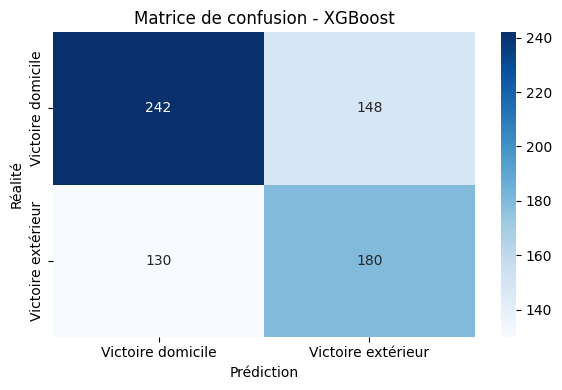

In [80]:
# on crée des étiquettes pour la identifier la variable cible (0,1)
class_labels = ['Victoire domicile', 'Victoire extérieur']                 

# on calcule les différentes métriques de performance à partir des variables cibles calculées et des données de test
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)            
class_report_xgb = classification_report(y_test, y_pred_xgb, target_names=class_labels)
cm = confusion_matrix(y_test, y_pred_xgb)

print(f"Exactitude du modèle XGBoost: {accuracy_xgb:.4f}")

print("\nRapport de classification:")
print(class_report_xgb)

# on crée un heatmap pour visualiser la matrice de confusion créée plus haut en associant aux valeurs x et y les étiquettes identifiées
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Matrice de confusion - XGBoost')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.tight_layout()
plt.show()

Afin de savoir quelles variables explicatives ont le plus d'importance pour le model on peut utiliser la fonction `feature_importances_`

Importance des variables explicatives - XGBoost:
                                Importance
DiffButsGlobal                    0.080833
DomicileCode                      0.064874
DiffForme                         0.060480
ExterieurCode                     0.059552
ExterieurAvgButsMarques_Home      0.049013
DiffButsDomicile                  0.047286
DomicileAvgButsMarques_Home       0.046698
FAF_VictoiresDomicile             0.046342
ExterieurAvgButsMarques_Away      0.045072
DiffButsExterieur                 0.044052
DomicileAvgButsMarques_Away       0.043988
ExterieurAvgButsEncaisses_Home    0.043315
SemaineSaison                     0.043235
FAF_VictoiresExterieur            0.043126
AnneeSaison                       0.042654
Mois                              0.041915
DomicileAvgButsEncaisses_Home     0.041656
DomicileAvgButsEncaisses_Away     0.040809
ExterieurAvgButsEncaisses_Away    0.040213
DomicileForme                     0.038468
ExterieurForme                    0.036420


<Figure size 1000x600 with 0 Axes>

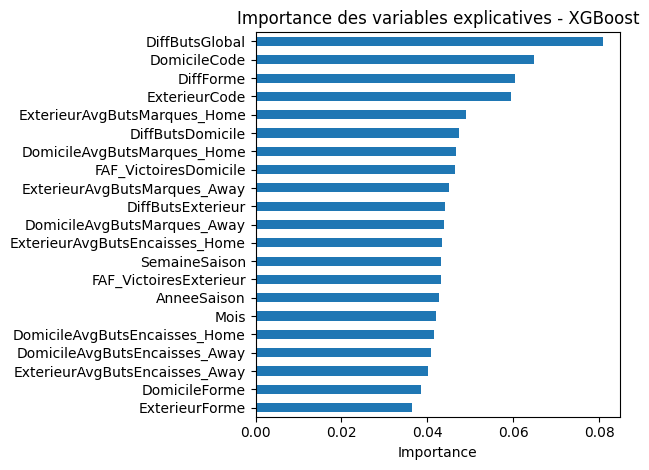

In [81]:
feature_importance = pd.DataFrame({
    'Importance': xgb_model.feature_importances_
}, index=features).sort_values('Importance', ascending=False)

print("Importance des variables explicatives - XGBoost:")
print(feature_importance)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', legend=False)
plt.gca().invert_yaxis()  
plt.xlabel('Importance')
plt.title('Importance des variables explicatives - XGBoost')
plt.tight_layout()
plt.show()

On peut également visualiser les différents arbres décisionnels utilisés par le modèle pour mieux expliquer sa prise de décision en utilisant la méthode `.plot_tree`

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


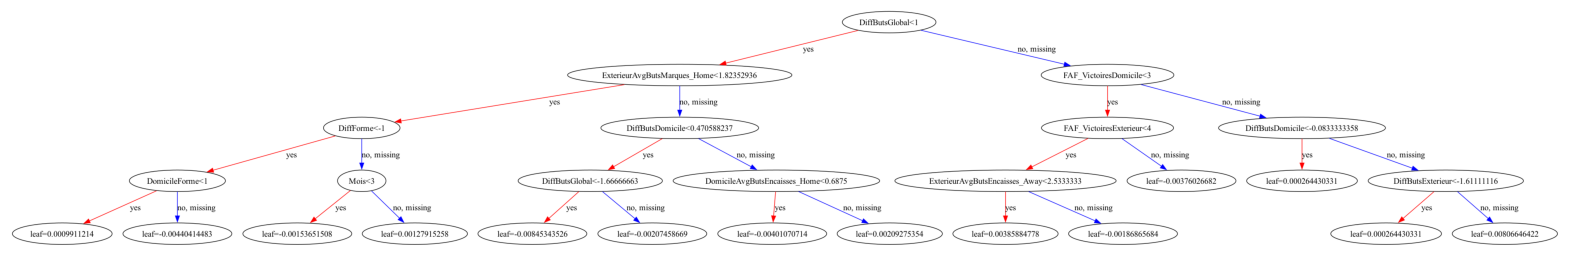

In [82]:
fig, ax = plt.subplots(figsize=(20, 10))
num_trees = 0
xgb.plot_tree(xgb_model, num_trees=num_trees, ax=ax)
fig.savefig(f'xgboost_tree_{num_trees}.png', dpi=300, bbox_inches='tight')

## Utiliser le modèle pour prédire des matchs futurs

In [136]:
xgb_model.save_model('xgb_model.json')

In [110]:
matchs['Date'].sort_values(ascending=False)

3690   2025-02-27
3689   2025-02-26
3688   2025-02-26
3687   2025-02-26
3686   2025-02-26
          ...    
2      2015-08-08
1      2015-08-08
4      2015-08-08
5      2015-08-08
0      2015-08-08
Name: Date, Length: 3691, dtype: datetime64[ns]

In [129]:
def predire_matchs(domicile, exterieur, date):

    predire_df = matchs

    features = [
        'DomicileCode', 'ExterieurCode', 'DomicileForme',
        'ExterieurForme', 'DiffForme', 'FAF_VictoiresDomicile', 
        'FAF_VictoiresExterieur', 'SemaineSaison', 'Mois', 'AnneeSaison',
        'DomicileAvgButsMarques_Home', 'DomicileAvgButsEncaisses_Home',
        'DomicileAvgButsMarques_Away', 'DomicileAvgButsEncaisses_Away',
        'ExterieurAvgButsMarques_Home', 'ExterieurAvgButsEncaisses_Home',
        'ExterieurAvgButsMarques_Away', 'ExterieurAvgButsEncaisses_Away',
        'DiffButsDomicile', 'DiffButsExterieur', 'DiffButsGlobal'
        #'DiffButs',
    ]
    
    new_row = {col: 0 for col in features if col in predire_df.columns}
    date = pd.to_datetime(date)
    new_row['Date'] = date
    new_row['DomicileCode'] = code_equipe.get(domicile)
    new_row['ExterieurCode'] = code_equipe.get(exterieur)
    new_row['Mois'] = date.month
    if date > pd.Timestamp(date.year, month=8, day=5):
        new_row['AnneeSaison'] = date.year - 1
    else:
        new_row['AnneeSaison'] = date.year
    new_row['SemaineSaison'] = ((date - pd.Timestamp(date.year, month=8, day=5)).days // 7) + 1
    
    matchs.loc[len(predire_df)] = new_row

    predire_df = stats_equipe(predire_df)
    predire_df = faf_equipes(predire_df)

    X_pred = predire_df.sort_values('Date', ascending=False).head(1)[features]
    y_pred = xgb_model.predict(X_pred)

    if y_pred == 0:
        prediction = print(f"Victoire de {exterieur}!")
    elif y_pred == 1:
        prediction = print(f"Victoire de {domicile}!")

    return prediction

In [134]:
equipes

array(['Bournemouth', 'Chelsea', 'Everton', 'Leicester', 'Man United',
       'Norwich', 'Arsenal', 'Newcastle', 'Stoke', 'West Brom',
       'Aston Villa', 'Southampton', 'Sunderland', 'Swansea', 'Tottenham',
       'Watford', 'West Ham', 'Crystal Palace', 'Man City', 'Liverpool',
       'Burnley', 'Hull', 'Middlesbrough', 'Brighton', 'Huddersfield',
       'Fulham', 'Wolves', 'Cardiff', 'Sheffield United', 'Leeds',
       'Brentford', "Nott'm Forest", 'Luton', 'Ipswich'], dtype=object)

In [131]:
predire_matchs('Southampton', 'Tottenham', '2025-03-20')

Victoire de Tottenham!
